In [1]:
#In this we will read the .csv file generated by RMG.Py's plotting function. Specifically we will be able to generate a 
#plot of the important species and numerically calculate things like selectivity

In [2]:
from rmgpy.species import Species
import matplotlib.pyplot as plt
import pandas
%matplotlib inline

In [42]:
#list(data)

/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/rgillis/anaconda2/env

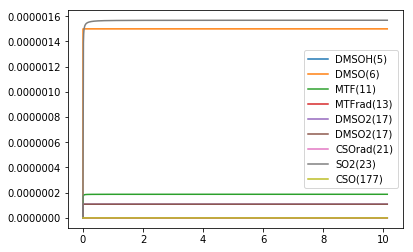

In [38]:
#This cell will generate plots of the species I care about
data = pandas.read_csv('/home/rgillis/Code/RMG-Py/examples/rmg/DMSOxy/t48/solver/simulation_1_40.csv')
data_mat = data.as_matrix()
#list(data)
#xvar = data.iloc[:,0]
#xvar_mat = xvar.as_matrix()
#print(xvar_mat)
#list(data.columns
for i in range(len(list(data))):
    if 'Time' in list(data)[i]:
        xvar = data.iloc[:,i]
        xvar_mat = xvar.as_matrix()
    if 'DMSO' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        plt.plot(xvar_mat, yvar1_mat, label=list(data)[i])
    if 'SO2' in list(data)[i]:
        yvar2 = data.iloc[:,i]
        yvar2_mat = yvar2.as_matrix()
        plt.plot(xvar_mat, yvar2_mat, label=list(data)[i])
    if 'MTF' in list(data)[i]:
        yvar3 = data.iloc[:,i]
        yvar3_mat = yvar3.as_matrix()
        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
    if 'CSO' in list(data)[i]:
        yvar4 = data.iloc[:,i]
        yvar4_mat = yvar4.as_matrix()
        plt.plot(xvar_mat, yvar3_mat, label=list(data)[i])
plt.legend()
#data.plot(x='Time (s)', y='DMSO(6)')
#data.plot(x='Time (s)', y='SO2(23)')
    

In [41]:
#This cell will calculate the final selectivities toward each of the products
for i in range(len(list(data))):
    if 'DMS(1)' in list(data)[i]:
        yvar1 = data.iloc[:,i]
        yvar1_mat = yvar1.as_matrix()
        DMS_init = yvar1_mat[0]
        DMS_final = yvar1_mat[-1]
        Delta_DMS = DMS_init - DMS_final
        DMS_index = i
        
for i in range(len(list(data))):
    yvar1 = data.iloc[:,i]
    yvar1_mat = yvar1.as_matrix()
    final_mole_fraction = yvar1_mat[-1]
    print str(list(data)[i]) + ': ' + str(final_mole_fraction/Delta_DMS)
        

Time (s): 2059716.15711
Volume (m^3): 5034.16842918
N2: 161516.594701
Ne: 0.0
DMS(1): 2.04771293497
HOOH(2): 2.0284368124
OH(3): 1.22741517445e-15
O2(4): 41652.1926679
DMSOH(5): 9.36051993352e-21
DMSO(6): 0.304615363764
OOH(7): 1.22290796146e-08
C2H5O2S(8): 6.65523620111e-05
CSCOrad(9): 1.20139103352e-17
CSCOH(10): 0.0396527043569
MTF(11): 0.0380927246925
CH3(12): 1.80336226429e-11
MTFrad(13): 3.40013942665e-21
CH4(14): 0.000161872762796
H2O(15): 3.28156979733
S(16): 1.33224189086e-41
DMSO2(17): 0.0221088791266
CSrad(18): 1.53242910096e-08
CH3O2S(19): 8.74099638798e-10
CH2S(20): 0.0887188258712
CSOrad(21): 1.16009757806e-08
O(22): 1.50295731719e-13
SO2(23): 0.31852867137
CH3O2S(24): 1.88415496287e-13
CH2O3(25): 0.0523358193988
CO2(26): 4.34385447904e-08
H(27): 8.28062851958e-19
HCO(32): 7.66473438121e-16
CH2O(36): 0.543162680789
C2H5S(53): 2.80560225046e-15
COS(101): 7.73097125802e-05
CH3OS(138): 2.1491390002e-10
COO(155): 0.115861798272
CH3O2(174): 0.200254562442
CSO(177): 0.185923273

/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/rgillis/anaconda2/envs/rmg_env/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
